In [13]:
import gudhi
import ripser
import numpy as np
import os
from persim import plot_diagrams

import matplotlib.pyplot as plot

# fancy models in our notebook
import pymesh
import pyvista as pv
from itkwidgets import view

In [14]:
def list_models():
    models_list = []
    with open('data/models_list.txt') as f:
        for line in f.readlines():
            if line[0] == '#':
                continue
            models_list.append(line.strip())
    
    return models_list

models = list_models()
for model in models:
    print(model)

retinal
spool
pipe
cactus
hand
P
anchor
joint
eight
bones
femur
star
elephant
pinion
knot
rotor
cow
nefertiti
sphere
triceratops
holes


In [15]:
models_dir_path = 'data/models/'
distance_matricies_dir_path = 'data/distance_matricies/'
homology_diagrams_dir_path = 'data/homology_diagrams/'

In [16]:
def display_model(model_name):
    filename = 'data/models/' + model_name + ".off"
    mesh = pv.read(filename)
    plotter = pv.Plotter()
    plotter.add_mesh(mesh)
    return plotter.show(use_panel=True)

def get_persistence_diagrams(model_name):
    dgms = np.load('data/homology_diagrams/' + model_name + '.npy', allow_pickle=True)
    return dgms

def display_persistence_diagrams_for_model(model_name):
    dgms = get_persistence_diagrams(model_name)
    plot_diagrams([dgms[0], dgms[1]])

def compare_persistence_diagrams_for_models(model_name1, model_name2, homology):
    dgms1 = get_persistence_diagrams(model_name1)
    dgms2 = get_persistence_diagrams(model_name2)
    plot_diagrams([dgms1[homology], dgms2[homology]], 
                  labels=[model_name1, model_name2], 
                  title='Daigram comparison for H{}'.format(homology))
    
def compute_persistence_diagrams_with_euclidian_metric(model_name):
    rips = ripser.Rips()
    filename = 'data/models/' + model_name + ".off"
    mesh = pymesh.load_mesh(filename)
    dgms = rips.fit_transform(mesh.vertices)
    return dgms

def find_similar_with_bottelneck_distance(target_model_name):
    all_models = list_models()
    all_models.remove(target_model_name)
    
    diagram1 = get_persistence_diagrams(target_model_name)
    max_similarity = float("-inf")
    model_name_with_max_similarty = ''
    for other_model_name in all_models:
        diagram2 = get_persistence_diagrams(other_model_name)
        distance = gudhi.bottleneck_distance(diagram1[1], diagram2[1])
        print('Bottleneck distance between {} and {} is {}'.format(target_model_name, other_model_name, distance))
        if distance > max_similarity:
            max_similarity = distance
            model_name_with_max_similarty = other_model_name
        
    return (model_name_with_max_similarty, max_similarity)
        

In [17]:
display_model('knot')

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

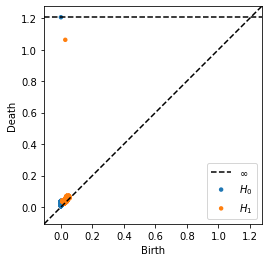

In [18]:
display_persistence_diagrams_for_model('knot')

In [11]:
display_model('knot')

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

Bottleneck distance between knot and retinal is 0.5174729721620679
Bottleneck distance between knot and spool is 0.5174729721620679
Bottleneck distance between knot and pipe is 0.5174729721620679
Bottleneck distance between knot and cactus is 0.5174729721620679
Bottleneck distance between knot and hand is 0.5174729721620679
Bottleneck distance between knot and P is 0.6412750482559204
Bottleneck distance between knot and anchor is 0.5174729721620678
Bottleneck distance between knot and joint is 0.5115950703620911
Bottleneck distance between knot and eight is 0.5174729721620679
Bottleneck distance between knot and bones is 0.31818306446075434
Bottleneck distance between knot and femur is 0.5174729721620679
Bottleneck distance between knot and star is 0.5174729721620679
Bottleneck distance between knot and elephant is 0.5174729721620678
Bottleneck distance between knot and pinion is 0.5151160359382628
Bottleneck distance between knot and rotor is 0.5174729721620679
Bottleneck distance bet

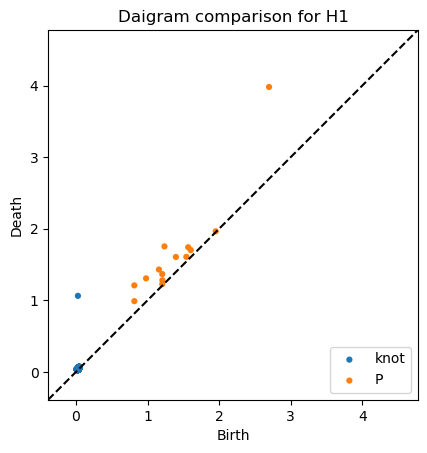

In [25]:
target_model = 'knot'
(most_similar_model, sim) = find_similar_with_bottelneck_distance(target_model)
print('By bottleneck distance {} is most similar to {} with {}'.format(target_model, most_similar_model, sim))
compare_persistence_diagrams_for_models(target_model, most_similar_model, 1)

In [19]:
display_model('bones')

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

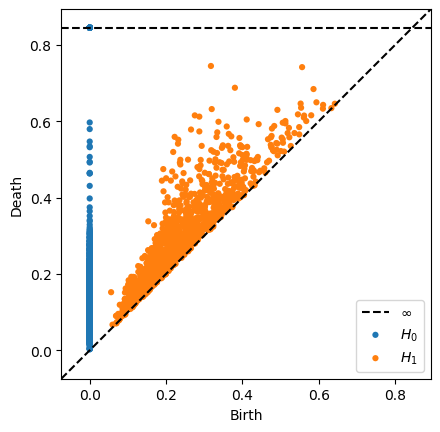

In [22]:
display_persistence_diagrams_for_model('bones')

In [20]:
display_model('elephant')

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

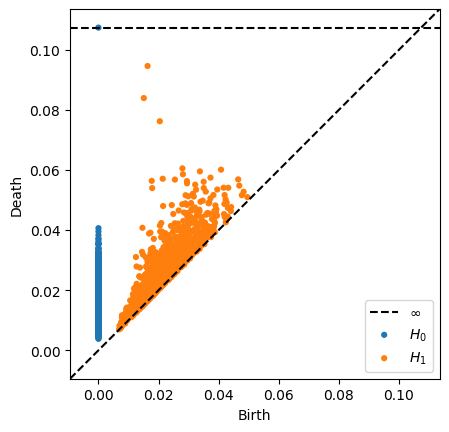

In [21]:
display_persistence_diagrams_for_model('elephant')

In [23]:
display_model('eight')

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

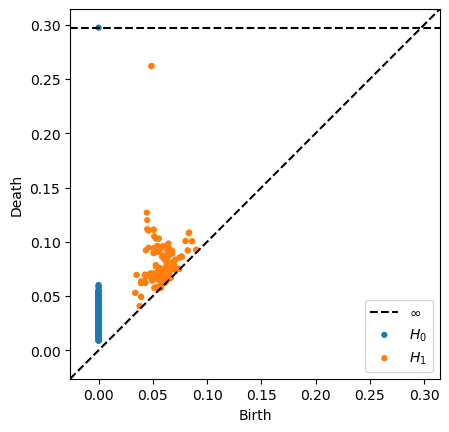

In [24]:
display_persistence_diagrams_for_model('eight')

In [33]:
dgms = get_persistence_diagrams('eight')
np.count_nonzero(dgms[1][:,1] > 0.25)

2

In [9]:
display_model('holes')

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

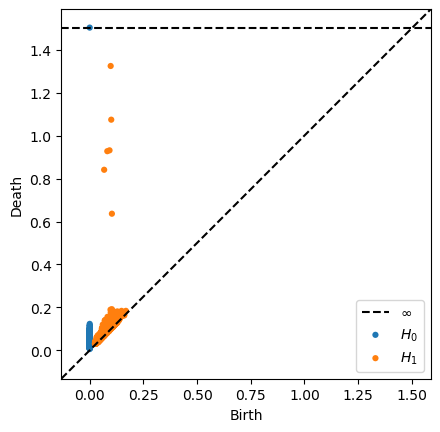

In [35]:
display_persistence_diagrams_for_model('holes')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


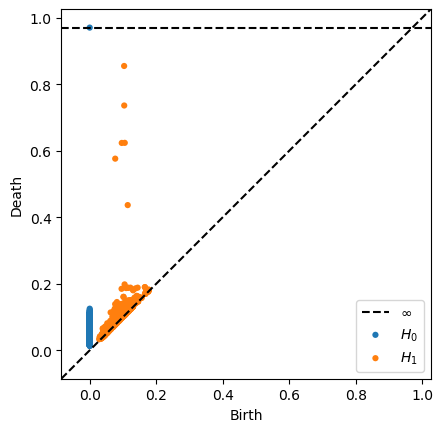

In [41]:
dgms = compute_persistence_diagrams_with_euclidian_metric('holes')
plot_diagrams(dgms)

In [ ]:
dgms = compute_persistence_diagrams_with_euclidian_metric('elephant')
plot_diagrams(dgms)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


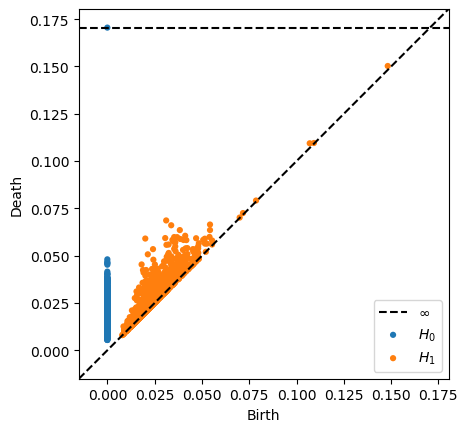

In [42]:
dgms = compute_persistence_diagrams_with_euclidian_metric('elephant')
plot_diagrams(dgms)